<a href="https://colab.research.google.com/github/DanushSridhar99/Capstone-Project-Malaria-Detection-Great-learning/blob/main/Malaria_detection_final_submission_Danush_Sridhar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from tensorflow.keras import optimizers

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

In [ ]:
# Storing the path of the extracted "train" folder
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:

            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                train_labels.append(1)

            else:

                train_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [ ]:
# Storing the path of the extracted "test" folder
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [ ]:
train_images.shape
test_images.shape




(2600, 64, 64, 3)

###<b> Checking the shape of train and test labels

In [ ]:
# Shape of labels
train_labels.shape
test_labels.shape

(2600,)

####<b> Observations and insights: The shape of both the images and the labels are the same showing that the the maleria detection in the images are matching to the reference image.


### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
print(np.min(train_images))
print(np.max(train_images))
print(np.min(test_images))
print(np.max(test_images))

0
255
0
255


In [ ]:
# Try to use value_counts to count the values
print(np.count_nonzero(train_labels==1))
print(np.count_nonzero(train_labels==0))
print(np.count_nonzero(test_labels==0))
print(np.count_nonzero(test_labels==1))
print(len(train_images))
len(test_images)

12582
12376
1300
1300
24958


2600

In [ ]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')

test_images = (test_images/255).astype('float32')

[]

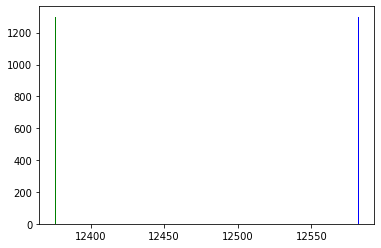

In [ ]:
import matplotlib.pyplot as plt
x1=np.count_nonzero(train_labels==1)
y1 = np.count_nonzero(test_labels == 1)
x2=np.count_nonzero(train_labels==0)
y2=np.count_nonzero(test_labels==0)

# y=test_labels
plt.bar(x1,y1, color='b', label="train data")
plt.bar(x2, y2, color='g',label="test data")
plt.plot()

### <b>Data Exploration</b>
Let's visualize the images from the train data

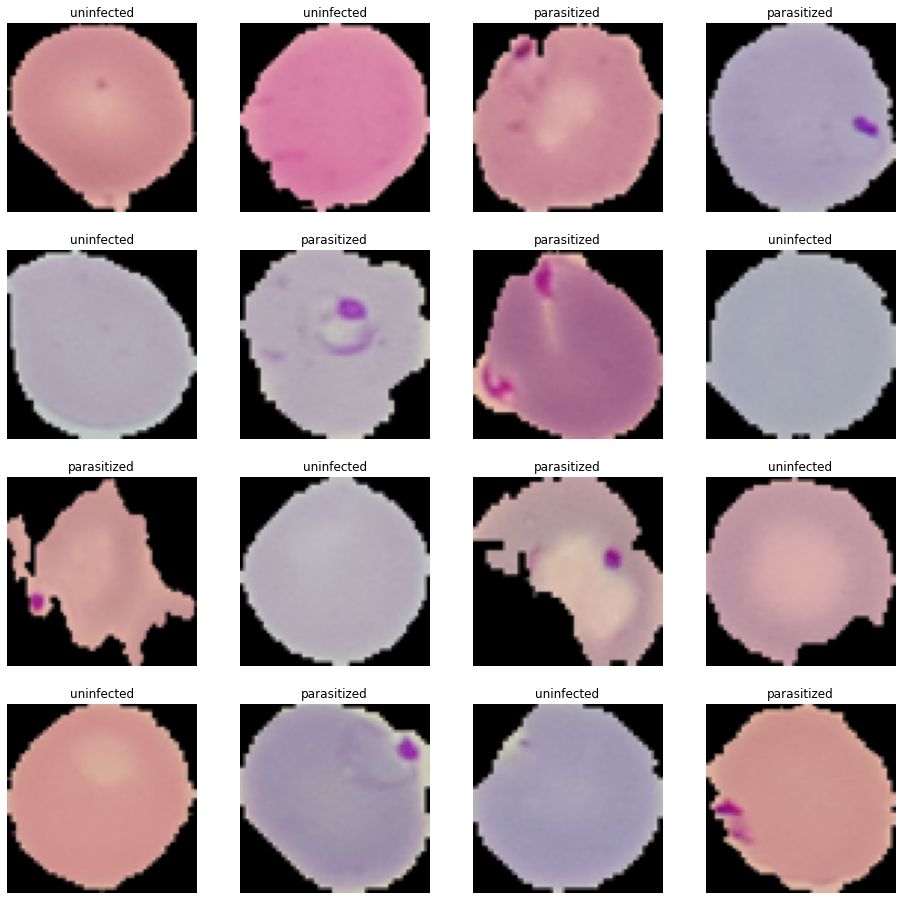

In [ ]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1:

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

###<b> Similarly visualize the images with subplot(6, 6) and figsize = (12, 12)

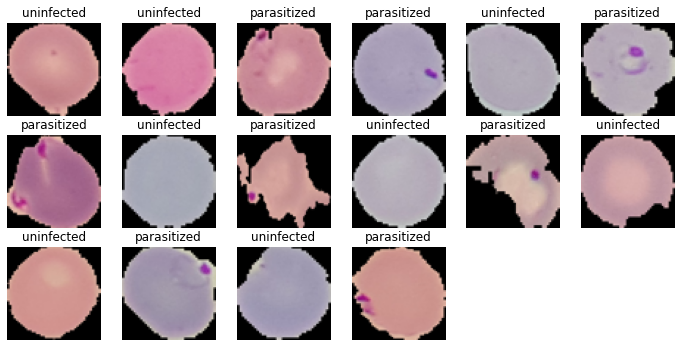

In [ ]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate

np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 17):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1:

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

###<b> Plotting the mean images for parasitized and uninfected

In [ ]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

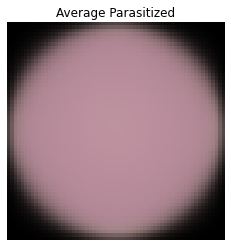

In [ ]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:

              parasitized_data.append([img])

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

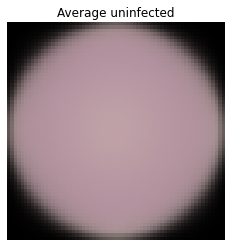

In [ ]:

uninfected_data = []

for img, label in zip(train_images, train_labels):

        if label == 0:

             uninfected_data.append([img])

uninfected_mean = find_mean_img(np.array(uninfected_data), 'uninfected')



### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [ ]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)

  gfx.append(a)

gfx = np.array(gfx)

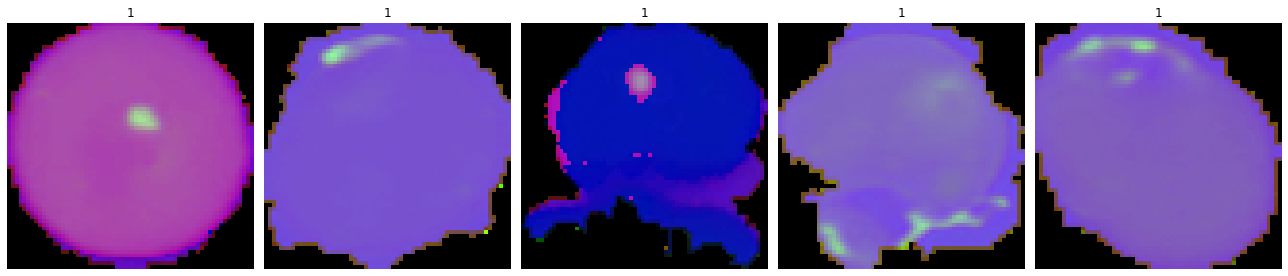

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

###<b> Converting the test data

In [ ]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)

  gfx.append(a)

gfx = np.array(gfx)

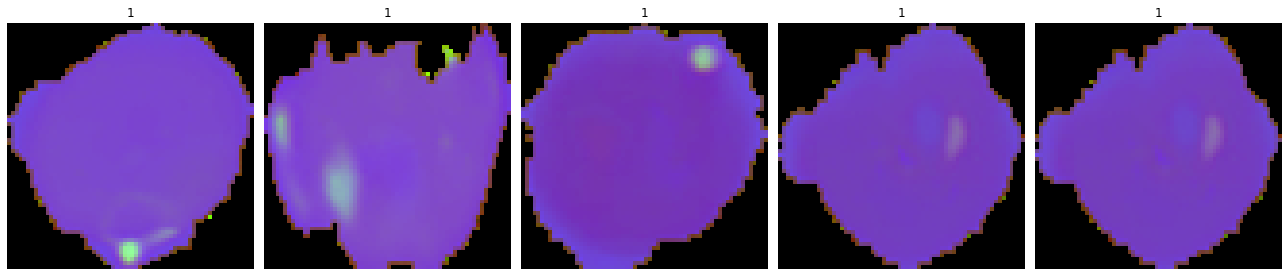

In [ ]:
# Similarly you can visualize for the images in the test data

viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [ ]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

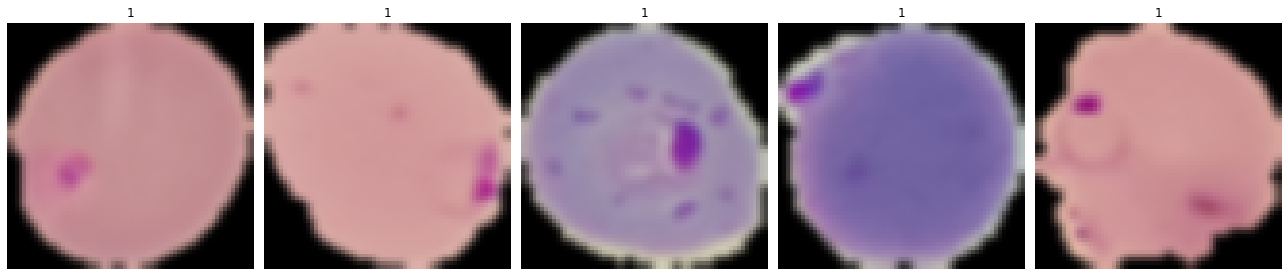

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)


  ax[t].imshow(gbx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

###<b> Gaussian Blurring on test data

In [ ]:
# Similarly you can apply Gaussian blurring for the images in the test data
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(test_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

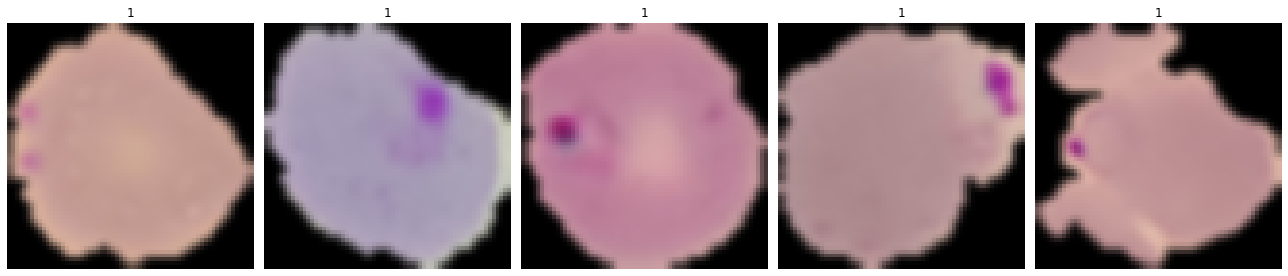

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)


  ax[t].imshow(gbx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

In [ ]:
# Encoding Train Labels
train_labels = tf.keras.utils.to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = tf.keras.utils.to_categorical(test_labels, 2)


In [ ]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Building the model

In [ ]:
# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [ ]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ]
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 4s 7ms/step - loss: 0.1389 - accuracy: 0.9516 - val_loss: 0.1467 - val_accuracy: 0.9828
Epoch 2/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0996 - accuracy: 0.9668 - val_loss: 0.0852 - val_accuracy: 0.9866
Epoch 3/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0846 - accuracy: 0.9710 - val_loss: 0.0805 - val_accuracy: 0.9836
Epoch 4/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0747 - accuracy: 0.9749 - val_loss: 0.0804 - val_accuracy: 0.9862
Epoch 5/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0718 - accuracy: 0.9749 - val_loss: 0.0637 - val_accuracy: 0.9852
Epoch 6/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0694 - accuracy: 0.9758 - val_loss: 0.0806 - val_accuracy: 0.9784
Epoch 7/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0651 - accuracy: 0.9782 - val_loss: 0.0528 - val_accuracy: 0.9850
Epoch 

###<b> Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 4ms/step - loss: 0.0867 - accuracy: 0.9792

 Test_Accuracy:- 0.9792307615280151


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



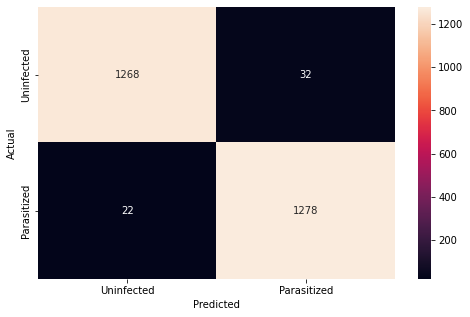

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [ ]:
# Function to plot train and validation accuracy
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")

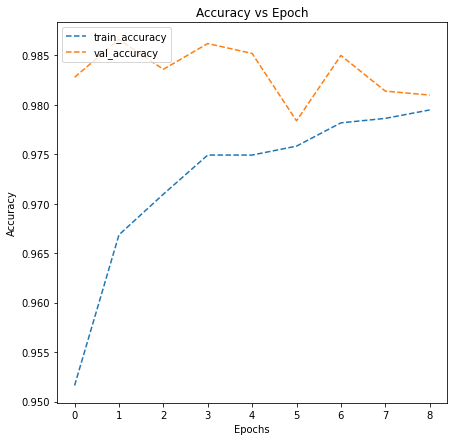

In [ ]:
plot_accuracy(history)



* Here we can clearly observe that the training and valiation accuracy are increasing
* And we can also notice that validation accuracy is slightly higher than the train accuracy

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
# Creating sequential model
model1 = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

model1.add(Conv2D(32,(3, 3), padding='same',activation='relu', input_shape=(64, 64, 3)))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(512, activation = "relu"))

model1.add(Dropout(0.4))

model1.add(Dense(2, activation = "softmax"))


# Build the model here and add new layers

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
history1 = model1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks,  validation_split = 0.2, epochs = 30, verbose = 1)


Epoch 1/30
624/624 [==============================] - 4s 7ms/step - loss: 0.1953 - accuracy: 0.9277 - val_loss: 0.1060 - val_accuracy: 0.9722
Epoch 2/30
624/624 [==============================] - 4s 7ms/step - loss: 0.1072 - accuracy: 0.9643 - val_loss: 0.0722 - val_accuracy: 0.9834
Epoch 3/30
624/624 [==============================] - 4s 6ms/step - loss: 0.0822 - accuracy: 0.9719 - val_loss: 0.0766 - val_accuracy: 0.9886
Epoch 4/30
624/624 [==============================] - 4s 7ms/step - loss: 0.0741 - accuracy: 0.9754 - val_loss: 0.0557 - val_accuracy: 0.9890
Epoch 5/30
624/624 [==============================] - 4s 7ms/step - loss: 0.0750 - accuracy: 0.9749 - val_loss: 0.0511 - val_accuracy: 0.9886
Epoch 6/30
624/624 [==============================] - 4s 6ms/step - loss: 0.0694 - accuracy: 0.9771 - val_loss: 0.0600 - val_accuracy: 0.9834
Epoch 7/30
624/624 [==============================] - 5s 7ms/step - loss: 0.0673 - accuracy: 0.9781 - val_loss: 0.0529 - val_accuracy: 0.9852


###<b> Evaluating the model

In [ ]:
accuracy1 = model1.evaluate(test_images , test_labels , verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy1[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.0958 - accuracy: 0.9819

 Test_Accuracy:- 0.9819231033325195


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



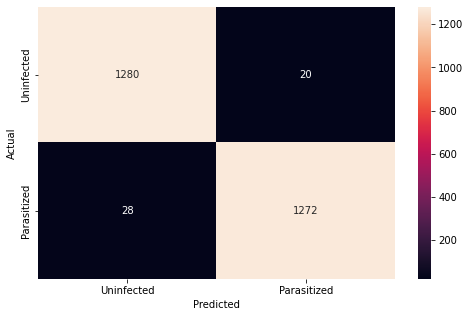

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model1.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Plotting the train and the validation curves

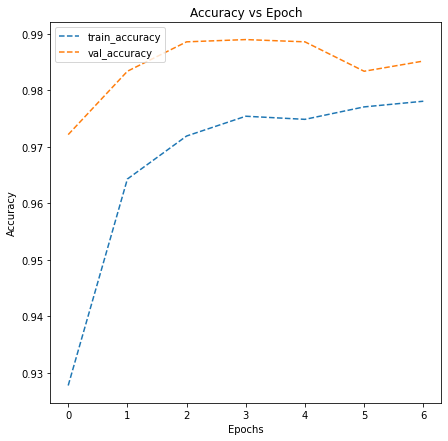

In [ ]:
def plot_accuracy(history1):

    N = len(history1.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history1.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history1.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")

plot_accuracy(history1)


###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))

model2.add(LeakyReLU(alpha=0.1))

model2.add(Conv2D(32, (3, 3), padding='same'))

model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPool2D((2, 2)))

model2.add(BatchNormalization())

model2.add(Conv2D(32, (3, 3), padding='same'))

model2.add(LeakyReLU(alpha=0.1))

model2.add(Conv2D(32, (3, 3), padding='same'))

model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPool2D((2, 2)))

model2.add(BatchNormalization())

model2.add(Flatten())

model2.add(Dense(512,activation='relu'))

model2.add(LeakyReLU(alpha=0.1))

model2.add(Dropout(0.4))

model2.add(Dense(2, activation = 'softmax'))

adam = optimizers.Adam(learning_rate = 0.001)

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                          

###<b>Compiling the model

In [ ]:
model2.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

<b> Using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]


<b>Fit and train the model

In [ ]:
history2 = model2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 6s 10ms/step - loss: 0.2311 - accuracy: 0.9041 - val_loss: 0.0704 - val_accuracy: 0.9898
Epoch 2/20
624/624 [==============================] - 6s 9ms/step - loss: 0.1048 - accuracy: 0.9662 - val_loss: 0.0617 - val_accuracy: 0.9994
Epoch 3/20
624/624 [==============================] - 5s 9ms/step - loss: 0.0854 - accuracy: 0.9729 - val_loss: 0.0368 - val_accuracy: 0.9922
Epoch 4/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0713 - accuracy: 0.9773 - val_loss: 0.1166 - val_accuracy: 0.9730
Epoch 5/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0546 - accuracy: 0.9825 - val_loss: 0.0417 - val_accuracy: 0.9902


<b>Plotting the train and validation accuracy

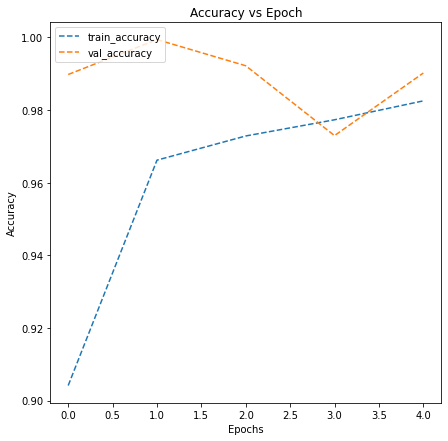

In [ ]:
def plot_accuracy(history2):

    N = len(history2.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history2.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history2.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")

plot_accuracy(history2)

###<b>Evaluating the model

In [ ]:
# Evaluate the model to calculate the accuracy

accuracy = model2.evaluate(test_images,test_labels , verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 5ms/step - loss: 0.1329 - accuracy: 0.9669

 Test_Accuracy:- 0.9669230580329895


####<b>Observations and insights: Bot value accuracy and the test accuracy in the solution are high showing that the catagorization between the parasitized and the uninfected cells are high.

<b> Generate the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1300
           1       0.99      0.95      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



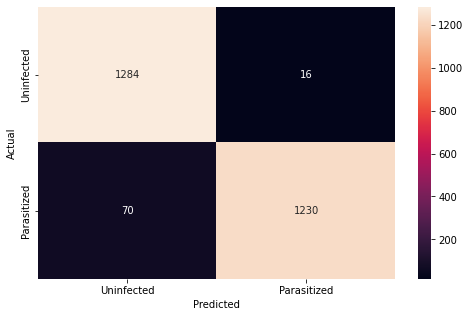

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [ ]:
backend.clear_session() # Clearing backend for new model

###<b> Using image data generator

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                  zoom_range = 0.5, rotation_range = 30)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = train_images , y = train_labels, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = test_images , y = test_labels, batch_size = 64, seed = 42, shuffle = True)

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

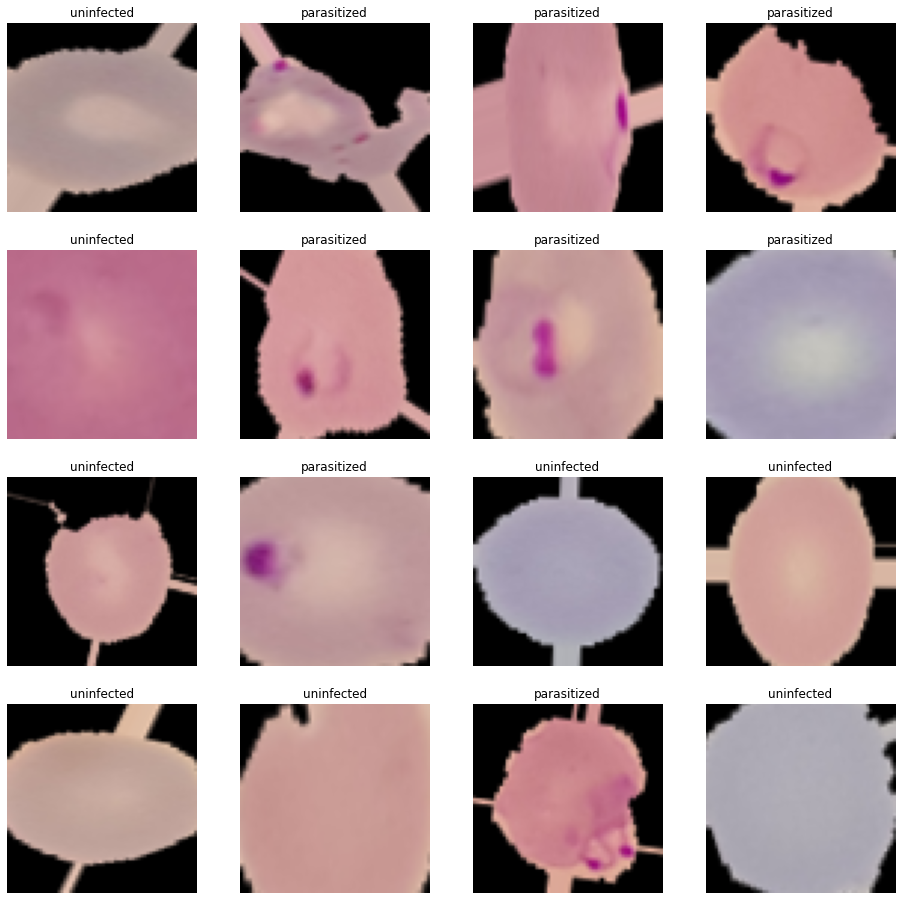

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1:

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

####<b>Observations and insights: The destinction between the uninfected and parasitized is significant in the images we see the uninfected is clear and does not have any paramaters or coloring diferences across the images but the parasitzed all have the spot and dye pink spots to show the parasitized cells.

###<b>Building the Model

In [ ]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))

model3.add(LeakyReLU(alpha=0.1))

model3.add(Conv2D(32, (3, 3), padding='same'))

model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPool2D((2, 2)))

model3.add(BatchNormalization())

model3.add(Conv2D(32, (3, 3), padding='same'))

model3.add(LeakyReLU(alpha=0.1))

model3.add(Conv2D(32, (3, 3), padding='same'))

model3.add(LeakyReLU(alpha=0.1))

model3.add(MaxPool2D((2, 2)))

model3.add(BatchNormalization())

model3.add(Flatten())

model3.add(Dense(512,activation='relu'))

model3.add(LeakyReLU(alpha=0.1))

model3.add(Dropout(0.4))

model3.add(Dense(2, activation = 'softmax'))



adam = optimizers.Adam(learning_rate = 0.001)

model3.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                          

<b>Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [ ]:
history3 = model3.fit(train_generator, validation_data = val_generator,batch_size = 32, callbacks = callbacks,epochs = 20, verbose = 1)

Epoch 1/20
390/390 [==============================] - 29s 75ms/step - loss: 0.1930 - accuracy: 0.9328 - val_loss: 0.1325 - val_accuracy: 0.9473
Epoch 2/20
390/390 [==============================] - 29s 75ms/step - loss: 0.1663 - accuracy: 0.9441 - val_loss: 0.0631 - val_accuracy: 0.9842
Epoch 3/20
390/390 [==============================] - 29s 74ms/step - loss: 0.1562 - accuracy: 0.9484 - val_loss: 0.1052 - val_accuracy: 0.9781
Epoch 4/20
390/390 [==============================] - 29s 74ms/step - loss: 0.1499 - accuracy: 0.9510 - val_loss: 0.0576 - val_accuracy: 0.9812
Epoch 5/20
390/390 [==============================] - 29s 73ms/step - loss: 0.1449 - accuracy: 0.9516 - val_loss: 0.0545 - val_accuracy: 0.9869
Epoch 6/20
390/390 [==============================] - 29s 74ms/step - loss: 0.1418 - accuracy: 0.9528 - val_loss: 0.1667 - val_accuracy: 0.9554
Epoch 7/20
390/390 [==============================] - 31s 79ms/step - loss: 0.1379 - accuracy: 0.9528 - val_loss: 0.0704 - val_accuracy:

###<B>Evaluating the model

<b>Plot the train and validation accuracy

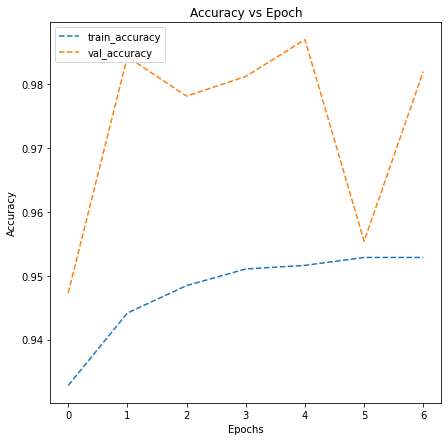

In [ ]:
# Potting the accuracies
plot_accuracy(history3)

In [ ]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 1s 5ms/step - loss: 0.0704 - accuracy: 0.9819

 Test_Accuracy:- 0.9819231033325195


<B>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1300
           1       0.99      0.97      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



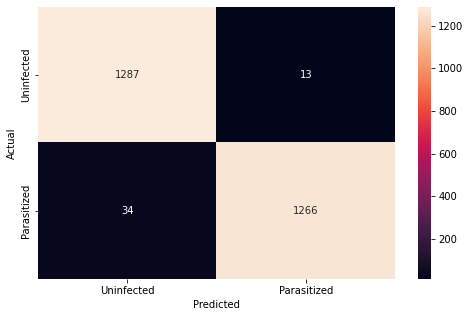

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model3.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model4 = Model(vgg.input, pred) # Initializing the model

###<b>Compiling the model

In [ ]:
# Compiling the model
model4.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

<b> using callbacks

In [ ]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
# Fitting the model and running the model for 10 epochs
history4 = model4.fit(train_images, train_labels,epochs = 10, callbacks = callbacks, batch_size = 32,validation_split = 0.2,verbose = 1)

Epoch 1/10
624/624 [==============================] - 10s 16ms/step - loss: 0.1451 - accuracy: 0.9449 - val_loss: 0.0968 - val_accuracy: 0.9748
Epoch 2/10
624/624 [==============================] - 9s 15ms/step - loss: 0.1466 - accuracy: 0.9448 - val_loss: 0.1451 - val_accuracy: 0.9611
Epoch 3/10
624/624 [==============================] - 10s 16ms/step - loss: 0.1478 - accuracy: 0.9456 - val_loss: 0.0641 - val_accuracy: 0.9864
Epoch 4/10
624/624 [==============================] - 9s 15ms/step - loss: 0.1451 - accuracy: 0.9445 - val_loss: 0.0898 - val_accuracy: 0.9800
Epoch 5/10
624/624 [==============================] - 10s 16ms/step - loss: 0.1373 - accuracy: 0.9468 - val_loss: 0.2091 - val_accuracy: 0.9317


<b>Plot the train and validation accuracy

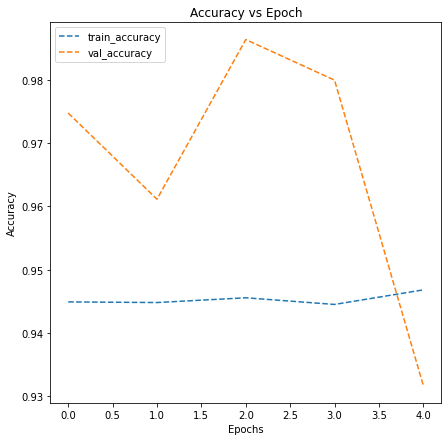

In [ ]:
# plotting the accuracies
plot_accuracy(history4)

###**Observations and insights: _____**

*  We can see that the train accuray across the different epochs has been close to 0.94 while the value accuracy has been equally high.

###<b> Evaluating the model

In [ ]:
# Evaluating the model on test data
accuracy4 = model4.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy4[1])

82/82 [==============================] - 1s 12ms/step - loss: 0.1905 - accuracy: 0.9281

 Test_Accuracy:- 0.9280769228935242


<b>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1300
           1       0.89      0.98      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.93      0.93      0.93      2600
weighted avg       0.93      0.93      0.93      2600



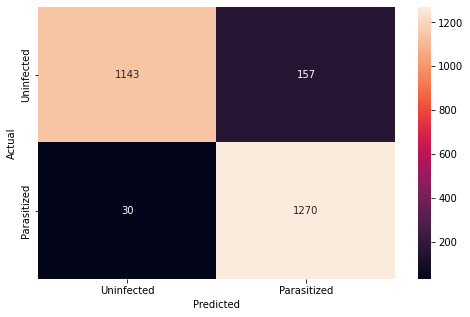

In [ ]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model4.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()